# https://devrimzimba.com - Webscraping

<img src='devrimabi.png'>

In [32]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import warnings 
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
from nltk.corpus import stopwords
##stopwords.words('turkish')
tr_stops = set(stopwords.words('turkish'))
##print stopwords.words() [620:680]

In [3]:
for i in range(1,7):
    page=requests.get('https://devrimzimba.com/blog/page/'+str(i))
    soup=BeautifulSoup(page.content,'html.parser')
    ##linkler.append(soup.find_all('h4',{'class':'entry-title'}))
    for link in (soup.find_all('h4',{'class':'entry-title'})):
        print(link.a.get('href'))
        #page2=requests.get(link.a.get('href'))
        #print(page2)

https://devrimzimba.com/sana-hayatin-sirrini-verecegim-dinle-2/
https://devrimzimba.com/sana-bir-sir-verecegim-hayatin-degisecek/
https://devrimzimba.com/kocaman-bir-mezarlikta-yasiyoruz/
https://devrimzimba.com/superman-de-olsan-sinek-gibi-yapistirirlar-cama/
https://devrimzimba.com/iyi-ki-varsin/
https://devrimzimba.com/bir-kutuya-kac-calisan-sigar-2/
https://devrimzimba.com/az-oz/
https://devrimzimba.com/yoneticinizi-kullanmadan-once-mutlaka-okuyunuz/
https://devrimzimba.com/bana-bir-efsane-anlat-obra-icinde-insanlik-olsun/
https://devrimzimba.com/sana-hayatin-sirrini-verecegim-dinle/
https://devrimzimba.com/siz-hic-yildiz-parlattiniz-mi/
https://devrimzimba.com/boyle-yonetiyorsaniz-kaybetmeye-mahkumsunuz/
https://devrimzimba.com/bu-gunahlari-islersen-cehennemde-yanarsin/
https://devrimzimba.com/maslow-yasasa-piramidini-degistirirdi/
https://devrimzimba.com/mutlulugun-resmi-kolay-peki-sunum-hazirlayabilir-misin-abidin/
https://devrimzimba.com/sana-guveniyorum/
https://devrimzimba.co

In [4]:
##Yöneticimin Tüm yazılarını okuyup wordcloud analizini yapıp 2 kolonluk bir  dataframe yazıp
## Wordcloud çıkartıyoruz.
yazilar=[]
basliklar=[]
for i in range(1,6):
    page=requests.get('https://devrimzimba.com/blog/page/'+str(i))
    soup=BeautifulSoup(page.content,'html.parser')
    ##linkler.append(soup.find_all('h4',{'class':'entry-title'}))
    for link in (soup.find_all('h4',{'class':'entry-title'})):
        print(link.a.get('href'))
        page2=requests.get(link.a.get('href'))
        soup2=BeautifulSoup(page2.content,'html.parser')
        ##basliklar.append(soup2.h2.text)            
        for i in soup2.find_all('p',{'class':"p1"}):
            yazilar.append(i.get_text())

https://devrimzimba.com/sana-hayatin-sirrini-verecegim-dinle-2/
https://devrimzimba.com/sana-bir-sir-verecegim-hayatin-degisecek/
https://devrimzimba.com/kocaman-bir-mezarlikta-yasiyoruz/
https://devrimzimba.com/superman-de-olsan-sinek-gibi-yapistirirlar-cama/
https://devrimzimba.com/iyi-ki-varsin/
https://devrimzimba.com/bir-kutuya-kac-calisan-sigar-2/
https://devrimzimba.com/az-oz/
https://devrimzimba.com/yoneticinizi-kullanmadan-once-mutlaka-okuyunuz/
https://devrimzimba.com/bana-bir-efsane-anlat-obra-icinde-insanlik-olsun/
https://devrimzimba.com/sana-hayatin-sirrini-verecegim-dinle/
https://devrimzimba.com/siz-hic-yildiz-parlattiniz-mi/
https://devrimzimba.com/boyle-yonetiyorsaniz-kaybetmeye-mahkumsunuz/
https://devrimzimba.com/bu-gunahlari-islersen-cehennemde-yanarsin/
https://devrimzimba.com/maslow-yasasa-piramidini-degistirirdi/
https://devrimzimba.com/mutlulugun-resmi-kolay-peki-sunum-hazirlayabilir-misin-abidin/
https://devrimzimba.com/sana-guveniyorum/
https://devrimzimba.co

In [5]:
yazilar

['Başkası olma, kendin ol',
 'Böyle çok daha güzelsin',
 'Şarkının mesajı çok net ama biz çoğunlukla enerji dolu bir müzik eşliğinde sanırım mesajı atladık. Tamam isterseniz şöyle yapalım ☺ ben konuya tamamen toplumsal boyuttan yaklaşıp şarkıyı katletmeden siz önce dinleyin sonra devam edelim☺ Ben beklerim gerçekten hiç sorun değil.',
 'Dinlediniz mi?\xa0',
 'İnsanın içi kıpır kıpır oluyor değil mi? Yalan yok ben yazmaya başlamadan önce birkaç kez dinledim ☺ Yıllarca dinleyip, eşlik ederek dans ettiğimiz şarkı aslında içinde bir felsefe barındırıyor. Ama kafamız da karışıyor bu konuda çünkü Sezen Aksu’nun verdiği mesajı çevremizdeki çoğu kimsenin vermediği bir toplumda yaşıyoruz.\xa0',
 'İmkan olsa bir anket yapsak bu yazıyı okuyanlardan kaç kişi kendisi ya da bir yakını aşağıdaki örnekleri yaşadı desek sanırım oran 100%’e yakın bir seviyede çıkar;',
 'Annem acaba gerçekte Barış’ın annesi olabilir mi? Çünkü Barış’ın notunu benim notundan daha çok merak ediyor, gerçi çok da benzemiyorla

In [6]:
df=pd.DataFrame(columns=['baslik','yazi'])

In [7]:
df['baslik']=basliklar
df['yazi']=yazilar

In [8]:
df.shape

(563, 2)

In [9]:
df.head(5)

,baslik,yazi
0,NaN,"Başkası olma, kendin ol"
1,NaN,Böyle çok daha güzelsin
2,NaN,Şarkının mesajı çok net ama biz çoğunlukla ene...
3,NaN,Dinlediniz mi?
4,NaN,İnsanın içi kıpır kıpır oluyor değil mi? Yalan...


In [10]:
df["yazi"]=df["yazi"].str.lower() #küçük harfe çevrildi
df["yazi"]=df["yazi"].str.replace("[^\w\s]","") #noktalama işaretlerini kaldırır
df["yazi"]=df["yazi"].str.replace("\d+","") #d digit rakamları kaldırır
df["yazi"]=df["yazi"].str.replace("\n"," ").replace("\r","") #Satır sonu,\n enter a basılmışsa \
df["yazi"]=df["yazi"].str.replace("\xa0"," ")
df["yazi"]=df["yazi"].str.replace("'","")

In [11]:
df.yazi[0]

'başkası olma kendin ol'

In [12]:
tr_stops

{'acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'en',
 'eğer',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'ile',
 'ise',
 'için',
 'kez',
 'ki',
 'kim',
 'mu',
 'mü',
 'mı',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niye',
 'niçin',
 'o',
 'sanki',
 'siz',
 'tüm',
 've',
 'veya',
 'ya',
 'yani',
 'çok',
 'çünkü',
 'şey',
 'şu'}

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   baslik  0 non-null      float64
 1   yazi    570 non-null    object 
dtypes: float64(1), object(1)
memory usage: 9.0+ KB


In [13]:
all_text = ' '.join(df['yazi'].values)

In [14]:
all_text

'başkası olma kendin ol böyle çok daha güzelsin şarkının mesajı çok net ama biz çoğunlukla enerji dolu bir müzik eşliğinde sanırım mesajı atladık tamam isterseniz şöyle yapalım  ben konuya tamamen toplumsal boyuttan yaklaşıp şarkıyı katletmeden siz önce dinleyin sonra devam edelim ben beklerim gerçekten hiç sorun değil dinlediniz mi  insanın içi kıpır kıpır oluyor değil mi yalan yok ben yazmaya başlamadan önce birkaç kez dinledim  yıllarca dinleyip eşlik ederek dans ettiğimiz şarkı aslında içinde bir felsefe barındırıyor ama kafamız da karışıyor bu konuda çünkü sezen aksunun verdiği mesajı çevremizdeki çoğu kimsenin vermediği bir toplumda yaşıyoruz  imkan olsa bir anket yapsak bu yazıyı okuyanlardan kaç kişi kendisi ya da bir yakını aşağıdaki örnekleri yaşadı desek sanırım oran e yakın bir seviyede çıkar annem acaba gerçekte barışın annesi olabilir mi çünkü barışın notunu benim notundan daha çok merak ediyor gerçi çok da benzemiyorlar zira barış sarışın açık tenli bir çocuk annem ise e

In [64]:
df2=pd.DataFrame(columns=['yazi'])

In [55]:
text_without_stopwords=[]
for word in all_text.split():
    if word not in tr_stops:
        text_without_stopwords.append(word)

In [65]:
df2['yazi']=text_without_stopwords

In [67]:
df2.shape

(23286, 1)

In [68]:
df2.head()

,yazi
0,başkası
1,olma
2,kendin
3,ol
4,böyle


In [16]:
text_without_stopwords

['başkası',
 'olma',
 'kendin',
 'ol',
 'böyle',
 'güzelsin',
 'şarkının',
 'mesajı',
 'net',
 'çoğunlukla',
 'enerji',
 'dolu',
 'bir',
 'müzik',
 'eşliğinde',
 'sanırım',
 'mesajı',
 'atladık',
 'tamam',
 'isterseniz',
 'şöyle',
 'yapalım',
 'ben',
 'konuya',
 'tamamen',
 'toplumsal',
 'boyuttan',
 'yaklaşıp',
 'şarkıyı',
 'katletmeden',
 'önce',
 'dinleyin',
 'sonra',
 'devam',
 'edelim',
 'ben',
 'beklerim',
 'gerçekten',
 'sorun',
 'değil',
 'dinlediniz',
 'mi',
 'insanın',
 'içi',
 'kıpır',
 'kıpır',
 'oluyor',
 'değil',
 'mi',
 'yalan',
 'yok',
 'ben',
 'yazmaya',
 'başlamadan',
 'önce',
 'dinledim',
 'yıllarca',
 'dinleyip',
 'eşlik',
 'ederek',
 'dans',
 'ettiğimiz',
 'şarkı',
 'içinde',
 'bir',
 'felsefe',
 'barındırıyor',
 'kafamız',
 'karışıyor',
 'konuda',
 'sezen',
 'aksunun',
 'verdiği',
 'mesajı',
 'çevremizdeki',
 'çoğu',
 'kimsenin',
 'vermediği',
 'bir',
 'toplumda',
 'yaşıyoruz',
 'imkan',
 'olsa',
 'bir',
 'anket',
 'yapsak',
 'yazıyı',
 'okuyanlardan',
 'kaç',
 'k

In [17]:
all_text2 = ' '.join(text_without_stopwords)

In [80]:
all_text2

'başkası olma kendin ol böyle güzelsin şarkının mesajı net çoğunlukla enerji dolu bir müzik eşliğinde sanırım mesajı atladık tamam isterseniz şöyle yapalım ben konuya tamamen toplumsal boyuttan yaklaşıp şarkıyı katletmeden önce dinleyin sonra devam edelim ben beklerim gerçekten sorun değil dinlediniz mi insanın içi kıpır kıpır oluyor değil mi yalan yok ben yazmaya başlamadan önce dinledim yıllarca dinleyip eşlik ederek dans ettiğimiz şarkı içinde bir felsefe barındırıyor kafamız karışıyor konuda sezen aksunun verdiği mesajı çevremizdeki çoğu kimsenin vermediği bir toplumda yaşıyoruz imkan olsa bir anket yapsak yazıyı okuyanlardan kaç kişi kendisi bir yakını aşağıdaki örnekleri yaşadı desek sanırım oran e yakın bir seviyede çıkar annem gerçekte barışın annesi olabilir mi barışın notunu benim notundan merak ediyor gerçi benzemiyorlar zira barış sarışın açık tenli bir çocuk annem esmer yahu aldım gerçekten iyi bir not fakat sevinemiyorum ucube barış aldı alabilirdim gayet mümkündü ancak b

In [69]:
text_without_stopwords

['başkası',
 'olma',
 'kendin',
 'ol',
 'böyle',
 'güzelsin',
 'şarkının',
 'mesajı',
 'net',
 'çoğunlukla',
 'enerji',
 'dolu',
 'bir',
 'müzik',
 'eşliğinde',
 'sanırım',
 'mesajı',
 'atladık',
 'tamam',
 'isterseniz',
 'şöyle',
 'yapalım',
 'ben',
 'konuya',
 'tamamen',
 'toplumsal',
 'boyuttan',
 'yaklaşıp',
 'şarkıyı',
 'katletmeden',
 'önce',
 'dinleyin',
 'sonra',
 'devam',
 'edelim',
 'ben',
 'beklerim',
 'gerçekten',
 'sorun',
 'değil',
 'dinlediniz',
 'mi',
 'insanın',
 'içi',
 'kıpır',
 'kıpır',
 'oluyor',
 'değil',
 'mi',
 'yalan',
 'yok',
 'ben',
 'yazmaya',
 'başlamadan',
 'önce',
 'dinledim',
 'yıllarca',
 'dinleyip',
 'eşlik',
 'ederek',
 'dans',
 'ettiğimiz',
 'şarkı',
 'içinde',
 'bir',
 'felsefe',
 'barındırıyor',
 'kafamız',
 'karışıyor',
 'konuda',
 'sezen',
 'aksunun',
 'verdiği',
 'mesajı',
 'çevremizdeki',
 'çoğu',
 'kimsenin',
 'vermediği',
 'bir',
 'toplumda',
 'yaşıyoruz',
 'imkan',
 'olsa',
 'bir',
 'anket',
 'yapsak',
 'yazıyı',
 'okuyanlardan',
 'kaç',
 'k

In [70]:
df2.to_csv('zimbayazilar.csv',index=False)

In [84]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

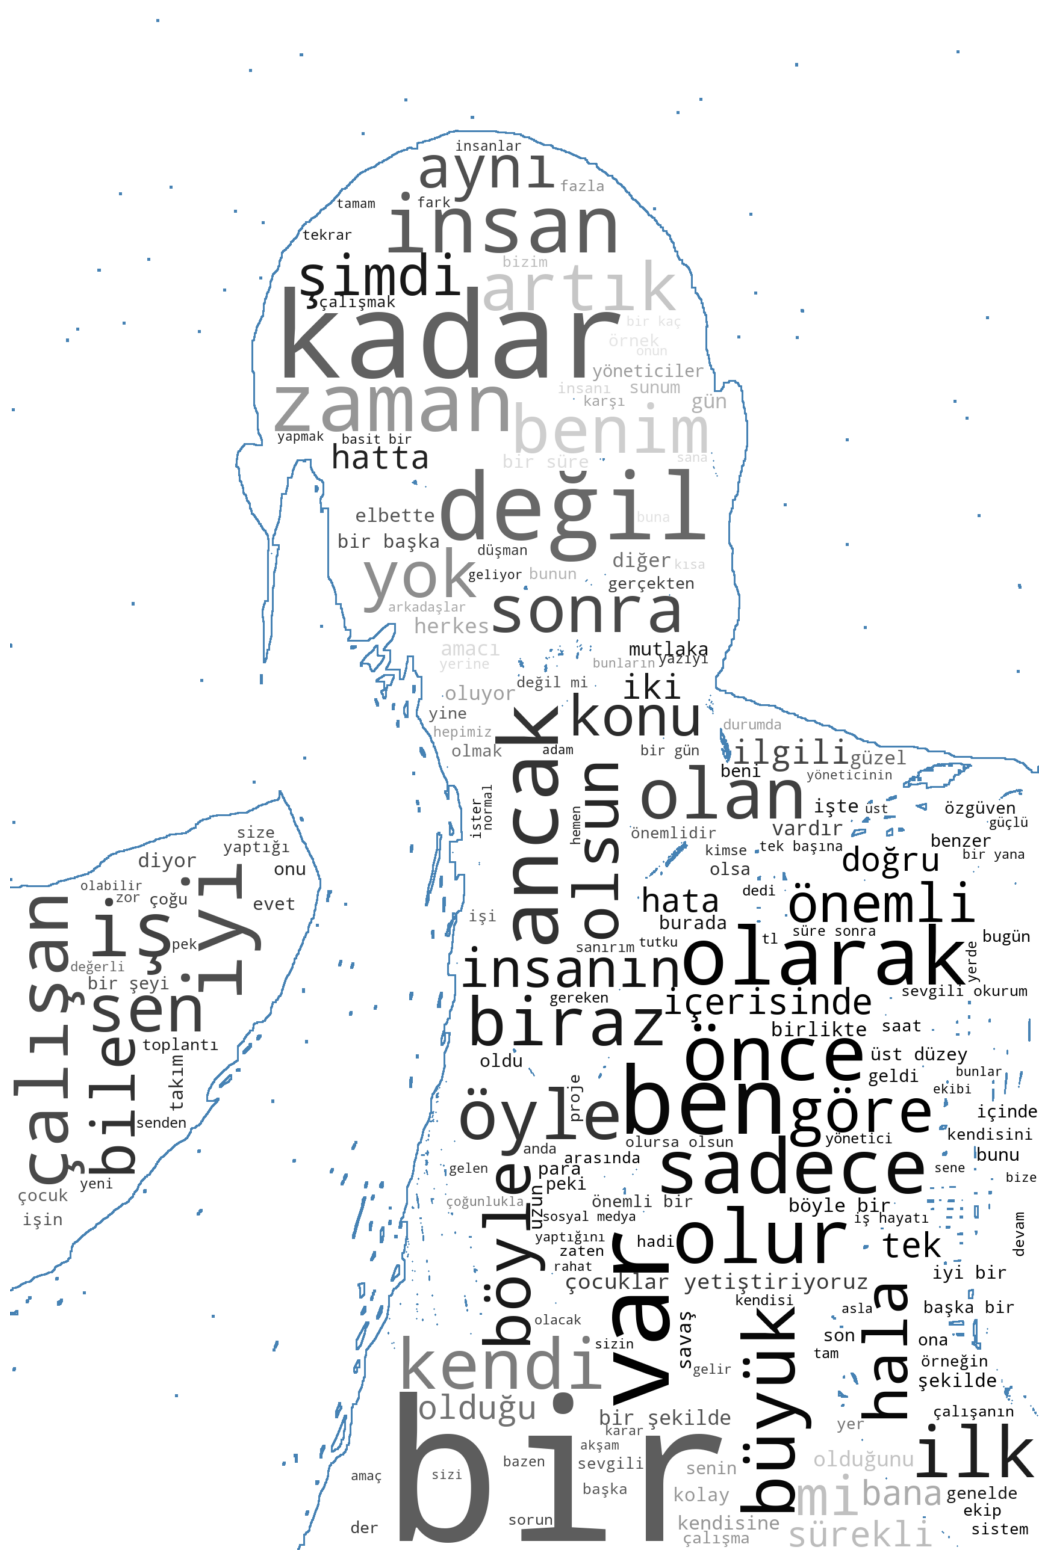

In [110]:
##ttles = np.array(Image.open("bottle size.png"))
bottles = np.array(Image.open("devrimabi3.png"))
wc = WordCloud(background_color="white", mask=bottles,
              contour_width=4, contour_color='steelblue')
wc.generate(all_text2)
image_colors = ImageColorGenerator(bottles)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(15,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()